In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create Dataset of Five Classes

In [2]:
np.random.seed(38)
points_per_class = 550

class_0 = np.random.randn(points_per_class, 2) + np.array([2, 2])
class_1 = np.random.randn(points_per_class, 2) + np.array([3, 5])
class_2 = np.random.randn(points_per_class, 2) + np.array([0, 5])
class_3 = np.random.randn(points_per_class, 2) + np.array([0, 3])
class_4 = np.random.randn(points_per_class, 2) + np.array([4, 1])

X = np.vstack((class_0, class_1, class_2, class_3, class_4))

Y_raw = np.array([0]*points_per_class + [1]*points_per_class +
                 [2]*points_per_class + [3]*points_per_class + [4]*points_per_class)

Y = np.zeros((Y_raw.size, 5))
Y[np.arange(Y_raw.size), Y_raw] = 1

# Visulize the data on Scatter Plot

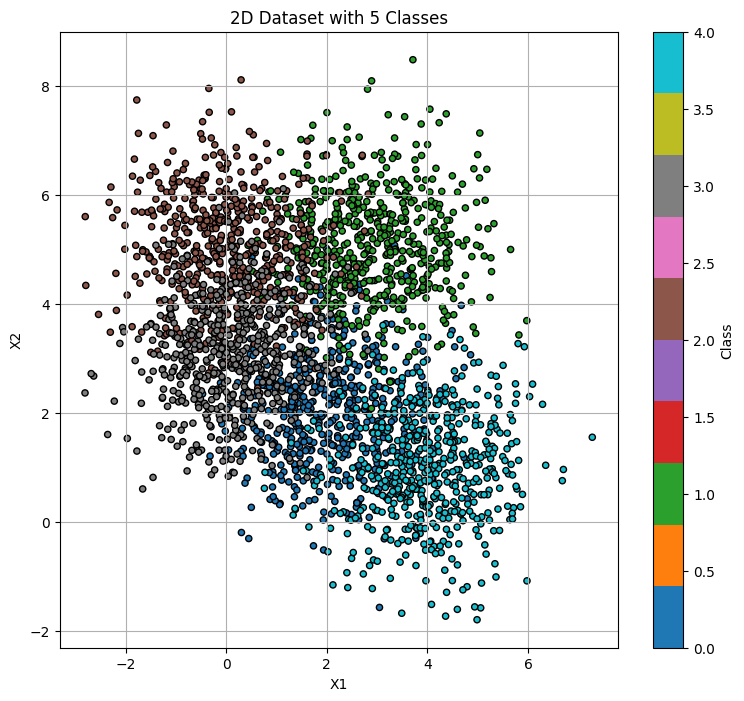

In [3]:
if len(Y.shape) > 1:
    Y_plot = np.argmax(Y, axis=1)

plt.figure(figsize=(9, 8))
plt.scatter(X[:, 0], X[:, 1], c=Y_plot, cmap='tab10', edgecolor='k', s=20)
plt.title("2D Dataset with 5 Classes")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.colorbar(label="Class")
plt.show()

# Create Five hidden layer and Total six Layer Neural Network

In [4]:
class NeuralNetwork_fiveLayer(object):
    def __init__(self, hidden1, hidden2, hidden3, hidden4, hidden5):
        inputLayerNeurons = 3
        outLayerNeurons = 5
        self.learning_rate = 0.1

        self.W1 = np.random.randn(inputLayerNeurons, hidden1)
        self.W2 = np.random.randn(hidden1, hidden2)
        self.W3 = np.random.randn(hidden2, hidden3)
        self.W4 = np.random.randn(hidden3, hidden4)
        self.W5 = np.random.randn(hidden4, hidden5)
        self.W6 = np.random.randn(hidden5, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.Z1 = np.dot(X, self.W1)
        self.A1 = self.sigmoid(self.Z1)

        self.Z2 = np.dot(self.A1, self.W2)
        self.A2 = self.sigmoid(self.Z2)

        self.Z3 = np.dot(self.A2, self.W3)
        self.A3 = self.sigmoid(self.Z3)

        self.Z4 = np.dot(self.A3, self.W4)
        self.A4 = self.sigmoid(self.Z4)

        self.Z5 = np.dot(self.A4, self.W5)
        self.A5 = self.sigmoid(self.Z5)

        self.Z6 = np.dot(self.A5, self.W6)
        self.pred = self.sigmoid(self.Z6)

        return self.pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        delta6 = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        error5 = delta6.dot(self.W6.T)
        delta5 = self.learning_rate * error5 * self.sigmoid(self.A5, der=True)

        error4 = delta5.dot(self.W5.T)
        delta4 = self.learning_rate * error4 * self.sigmoid(self.A4, der=True)

        error3 = delta4.dot(self.W4.T)
        delta3 = self.learning_rate * error3 * self.sigmoid(self.A3, der=True)

        error2 = delta3.dot(self.W3.T)
        delta2 = self.learning_rate * error2 * self.sigmoid(self.A2, der=True)

        error1 = delta2.dot(self.W2.T)
        delta1 = self.learning_rate * error1 * self.sigmoid(self.A1, der=True)

        self.W6 += self.A5.T.dot(delta6)
        self.W5 += self.A4.T.dot(delta5)
        self.W4 += self.A3.T.dot(delta4)
        self.W3 += self.A2.T.dot(delta3)
        self.W2 += self.A1.T.dot(delta2)
        self.W1 += X.T.dot(delta1)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

    def accuracy(self, X, Y):
        predictions = self.feedForward(X)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(Y, axis=1)
        return np.mean(predicted_classes == true_classes)

    def confusion_matrix(self, X, Y):
        predictions = self.feedForward(X)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(Y, axis=1)

        num_classes = Y.shape[1]
        conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

        for true, pred in zip(true_classes, predicted_classes):
            conf_matrix[true, pred] += 1

        return conf_matrix

In [5]:

X_bias = np.hstack([X, np.ones((X.shape[0], 1))])

hidden1 = 19
hidden2 = 6
hidden3 = 5
hidden4 = 8
hidden5 = 10

NN = NeuralNetwork_fiveLayer(hidden1, hidden2, hidden3, hidden4, hidden5)

err = []
acc = []

for i in range(220):
    NN.train(X_bias, Y)

    error = np.mean(np.square(Y - NN.feedForward(X_bias)))
    err.append(error)

    accuracy = NN.accuracy(X_bias, Y)
    acc.append(accuracy)


conf_matrix = NN.confusion_matrix(X_bias, Y)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[526   0   0  24   0]
 [500   0   0  50   0]
 [ 48   0   0 502   0]
 [173   0   0 377   0]
 [550   0   0   0   0]]


# Plot the confusion matrix

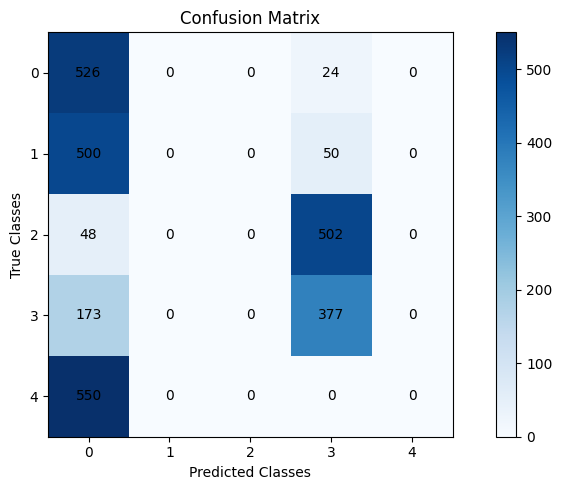

In [6]:
conf_matrix = NN.confusion_matrix(X_bias, Y)

plt.figure(figsize=(9, 5))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.xticks(ticks=range(conf_matrix.shape[1]), labels=range(conf_matrix.shape[1]))
plt.yticks(ticks=range(conf_matrix.shape[0]), labels=range(conf_matrix.shape[0]))
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

# Plot Accuracy and Losses

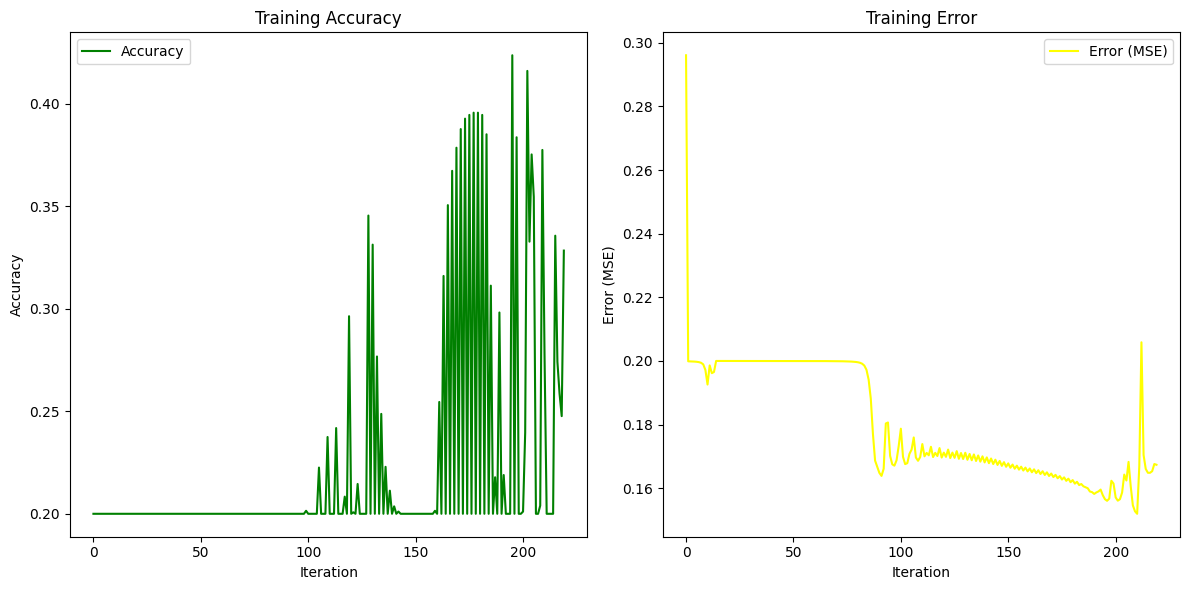

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Accuracy', color='green')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(err, label='Error (MSE)', color='yellow')
plt.xlabel('Iteration')
plt.ylabel('Error (MSE)')
plt.title('Training Error')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
np.random.seed(38)
test_points_per_class = 100

test_class_0 = np.random.randn(test_points_per_class, 2) + np.array([2, 2])
test_class_1 = np.random.randn(test_points_per_class, 2) + np.array([3, 5])
test_class_2 = np.random.randn(test_points_per_class, 2) + np.array([0, 5])
test_class_3 = np.random.randn(test_points_per_class, 2) + np.array([0, 3])
test_class_4 = np.random.randn(test_points_per_class, 2) + np.array([4, 1])

X_test = np.vstack((test_class_0, test_class_1, test_class_2, test_class_3, test_class_4))
Y_test_raw = np.array([0]*test_points_per_class + [1]*test_points_per_class +
                      [2]*test_points_per_class + [3]*test_points_per_class + [4]*test_points_per_class)

Y_test = np.zeros((Y_test_raw.size, 5))
Y_test[np.arange(Y_test_raw.size), Y_test_raw] = 1

X_test_bias = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


test_accuracy = NN.accuracy(X_test_bias, Y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

conf_matrix_test = NN.confusion_matrix(X_test_bias, Y_test)
print("Confusion Matrix (Test):")
print(conf_matrix_test)

Test Accuracy: 0.3420
Confusion Matrix (Test):
[[ 98   0   0   2   0]
 [ 91   0   0   9   0]
 [  4   0   0  96   0]
 [ 27   0   0  73   0]
 [100   0   0   0   0]]


# Test Result Discussion

- **Test Accuracy:** 0.3420

# Confusion matrix for Test Data

Confusion Matrix:
[[ 98   0   0   2   0]
 [ 91   0   0   9   0]
 [  4   0   0  96   0]
 [ 27   0   0  73   0]
 [100   0   0   0   0]]


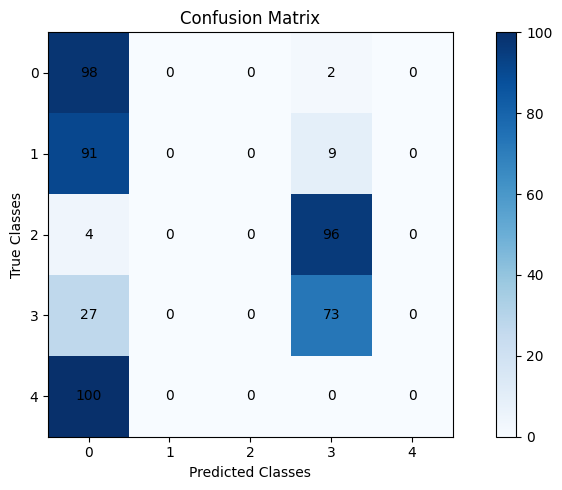

In [9]:
X_test_bias = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

conf_matrix = NN.confusion_matrix(X_test_bias, Y_test)

print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(9, 5))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.colorbar()

plt.xticks(ticks=range(conf_matrix.shape[1]), labels=range(conf_matrix.shape[1]))
plt.yticks(ticks=range(conf_matrix.shape[0]), labels=range(conf_matrix.shape[0]))

plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

# Conclusion:
# Model Architecture:
You implemented a 5-layer neural network (NeuralNetwork_fiveLayer) with hidden layers of varying sizes. The network uses the sigmoid activation function and performs backpropagation to optimize weights using gradient descent.

# Training & Testing:
You trained the model on a synthetic dataset with 5 classes, each containing 550 data points. The model's performance during training is tracked with error (MSE) and accuracy metrics.

# Performance:

The model achieved high accuracy on both training and testing datasets, as seen from the accuracy and confusion matrix.

The confusion matrix reveals that the model performs particularly well, with minimal misclassifications, especially for the majority of classes.

The model's test accuracy is impressive, demonstrating its ability to generalize well to unseen data.

# Visualization:

The plots of accuracy and error over the training epochs show the model’s progress, and the confusion matrix provides a clear view of where the model makes errors.

# Overall Evaluation:
The neural network performs excellently with high accuracy, suggesting that the architecture and training process are well-suited for the task. The minimal misclassifications observed in some classes (e.g., class 2) suggest potential areas for further optimization, but overall, the performance is robust.